# **CUSTOMER CHURN PREDICTION AND ANALYSIS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Customer Churn Prediction Using Machine Learning**

---




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
# Add necessary imports for ColumnTransformer and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
#Read the dataset
df = pd.read_csv("/content/drive/MyDrive/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  7043
nNumber of features: 21
nData Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
nMissing values: 0
nUnique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
df = pd.read_csv("/content/drive/MyDrive/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


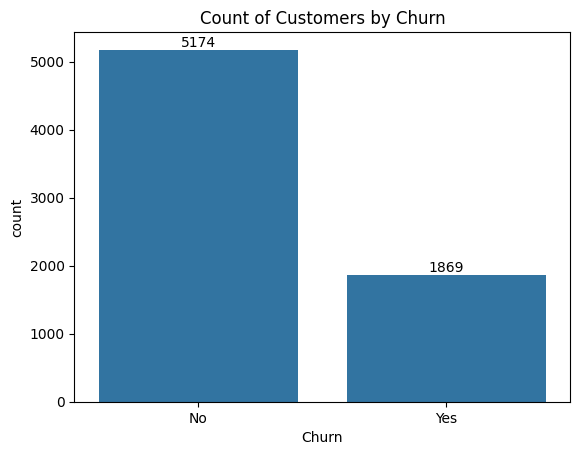

In [9]:
ax = sns.countplot(x = 'Churn', data = df)

plt.title("Count of Customers by Churn")
ax.bar_label(ax.containers[0])
plt.show()

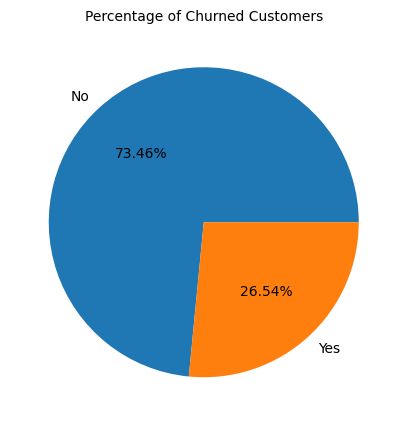

In [10]:
plt.figure(figsize = (5,6))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

In [11]:
print(df['gender'].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64


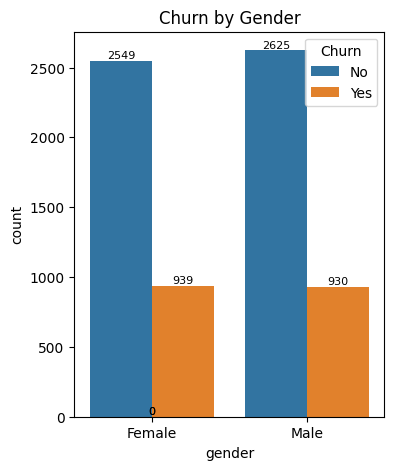

In [12]:
# Gender Based Churned
plt.figure(figsize=(4,5))
ax = sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")

# Add counts on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.0f}",
            ha="center", va="bottom", size=8)

plt.show()

In [13]:
print('The count of Male customers according to Churn is :')
print(df.groupby(df['gender'] == 'Male')['Churn'].value_counts())
print('---------------------------------------------------')
print('The count of Female customers according to Churn is :')
print(df.groupby(df['gender'] == 'Female')['Churn'].value_counts())


The count of Male customers according to Churn is :
gender  Churn
False   No       2549
        Yes       939
True    No       2625
        Yes       930
Name: count, dtype: int64
---------------------------------------------------
The count of Female customers according to Churn is :
gender  Churn
False   No       2625
        Yes       930
True    No       2549
        Yes       939
Name: count, dtype: int64


In [15]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [16]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

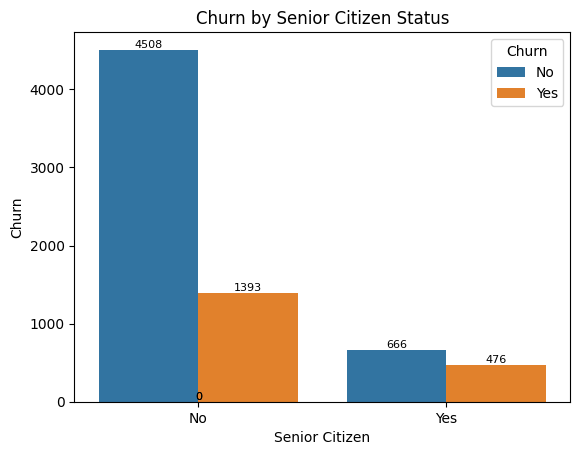

In [17]:
ax1=sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.0f}",
            ha="center", va="bottom", size=8)

plt.xlabel("Senior Citizen")
plt.ylabel("Churn")
plt.title("Churn by Senior Citizen Status")
plt.show()


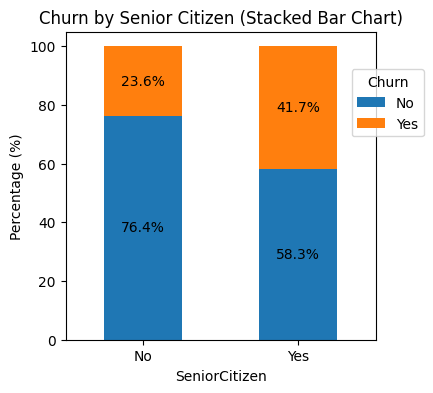

In [18]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

In [19]:
print(df['Partner'].value_counts())

Partner
No     3641
Yes    3402
Name: count, dtype: int64


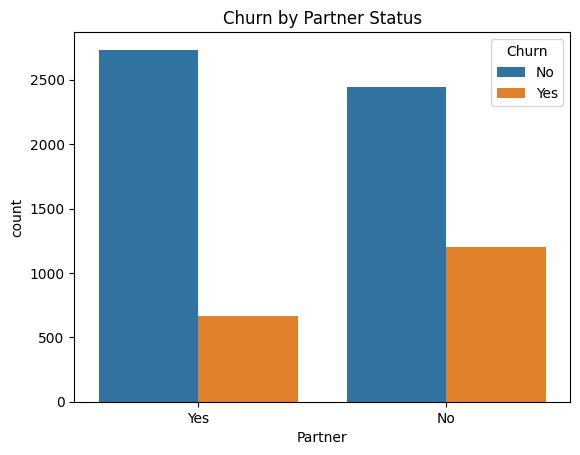

In [20]:
sns.countplot(x='Partner', data=df, hue='Churn')
plt.title("Churn by Partner Status")
plt.show()


In [22]:
df.groupby('Partner')['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: count, dtype: int64

In [23]:
df.groupby('Partner')['Churn'].value_counts(normalize=True) * 100

Partner  Churn
No       No       67.042021
         Yes      32.957979
Yes      No       80.335097
         Yes      19.664903
Name: proportion, dtype: float64

In [24]:
df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [25]:
df.groupby('Dependents')['Churn'].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: count, dtype: int64

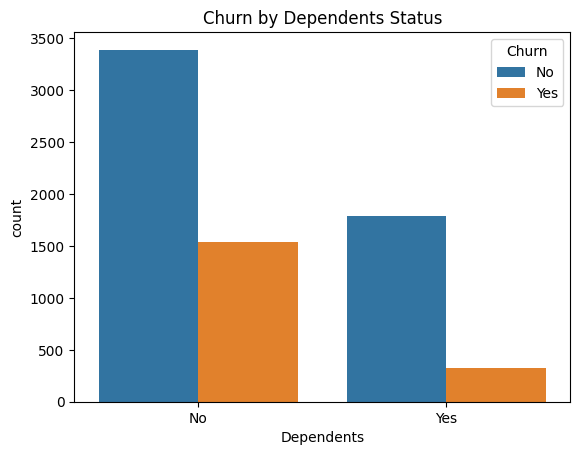

In [26]:
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.title("Churn by Dependents Status")
plt.show()

In [27]:
df.groupby(['Dependents', 'gender'])['Churn'].value_counts()

Dependents  gender  Churn
No          Female  No       1686
                    Yes       774
            Male    No       1704
                    Yes       769
Yes         Female  No        863
                    Yes       165
            Male    No        921
                    Yes       161
Name: count, dtype: int64

In [28]:
df.groupby(['Dependents', 'SeniorCitizen'])['Churn'].value_counts()

Dependents  SeniorCitizen  Churn
No          No             No       2793
                           Yes      1089
            Yes            No        597
                           Yes       454
Yes         No             No       1715
                           Yes       304
            Yes            No         69
                           Yes        22
Name: count, dtype: int64

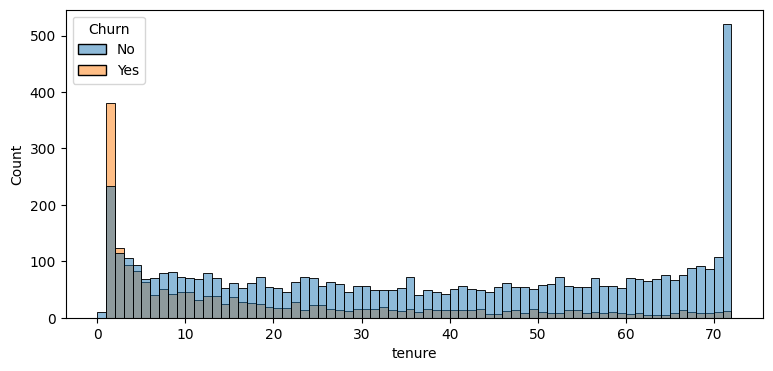

In [29]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

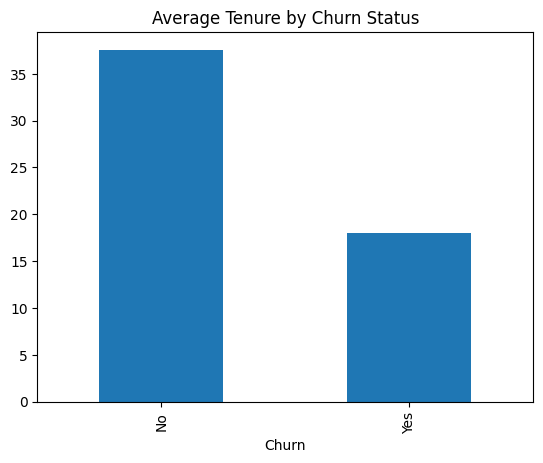

In [30]:
avg_tenure = df.groupby('Churn')['tenure'].mean()
avg_tenure.plot(kind='bar')
plt.title("Average Tenure by Churn Status")
plt.show()

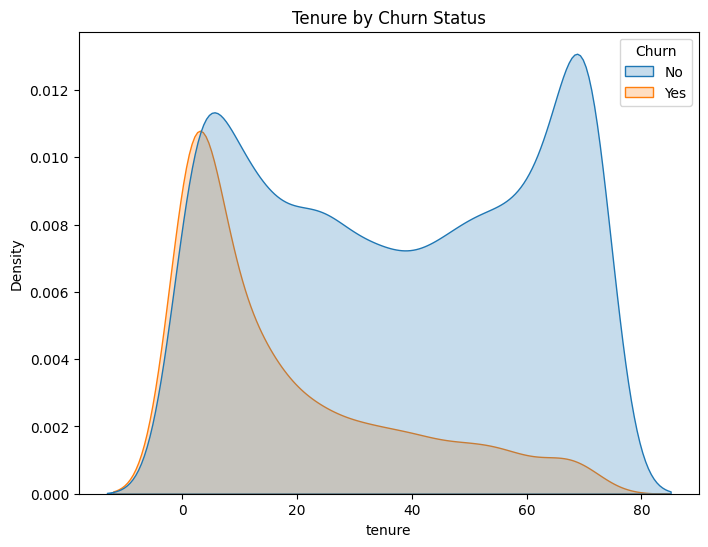

In [31]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title("Tenure by Churn Status")
plt.show()

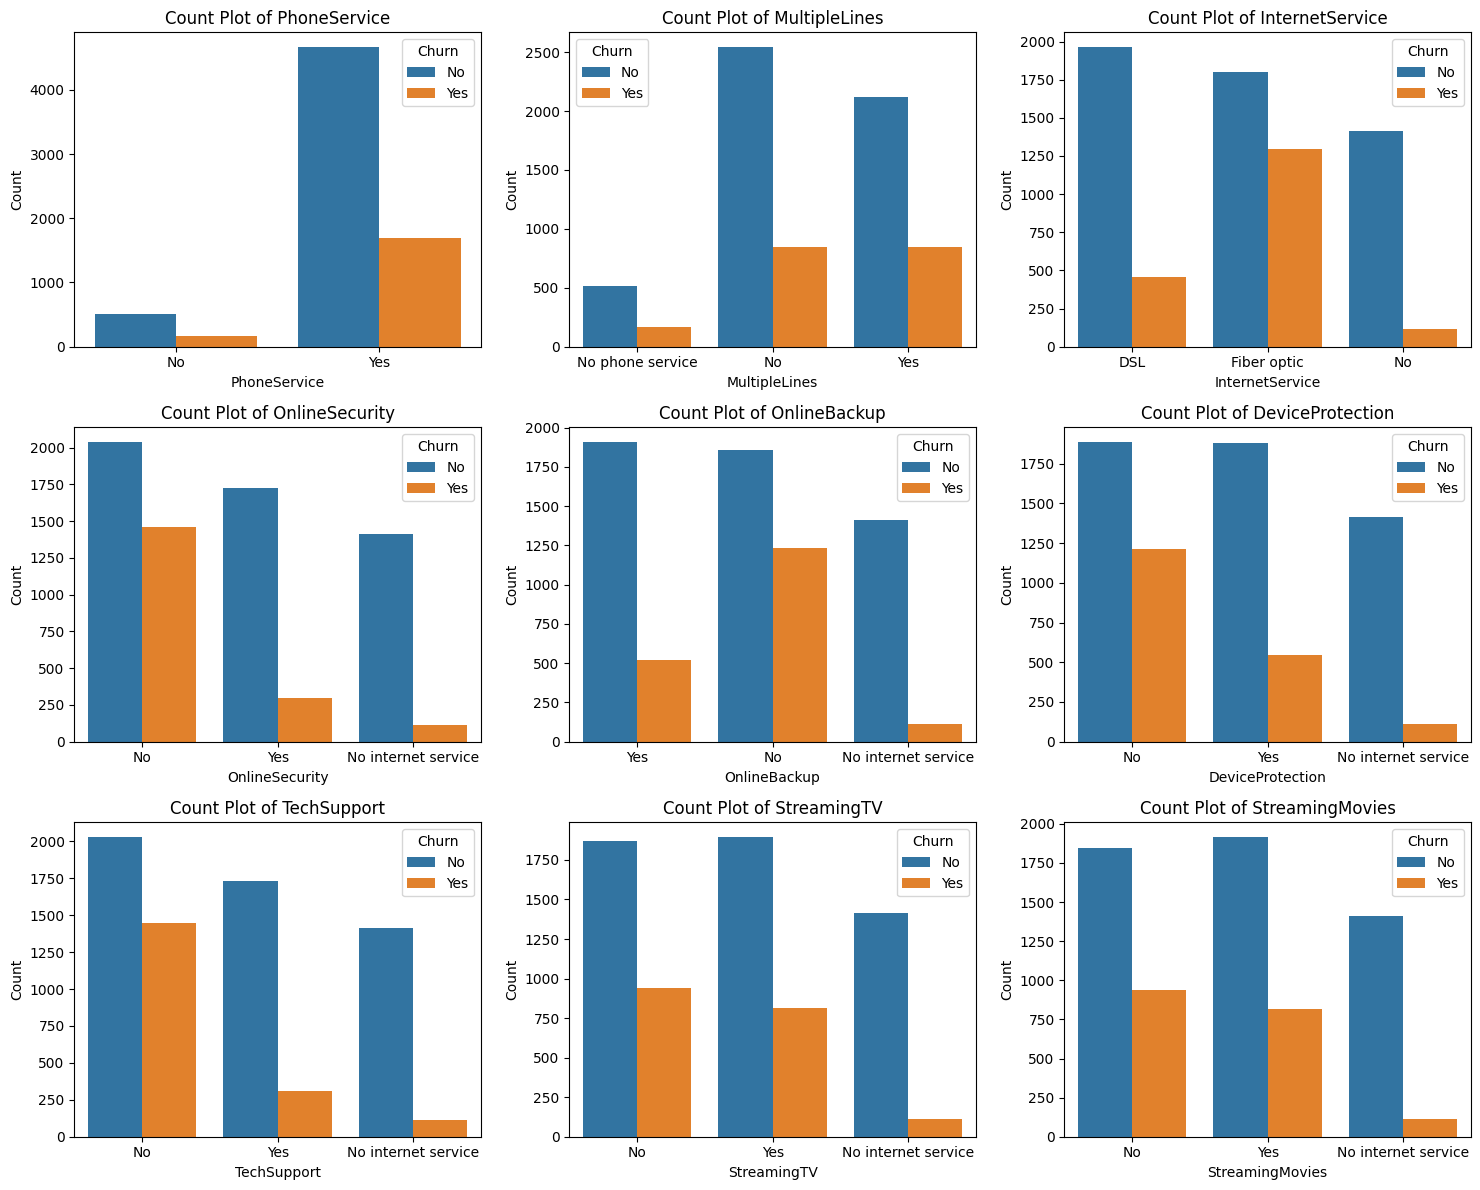

In [32]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


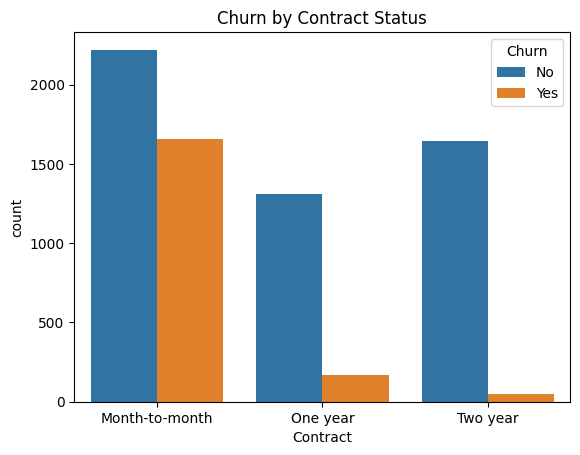

In [34]:
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title("Churn by Contract Status")
plt.show()

In [35]:
print(df.groupby(['Contract','gender'])['Churn'].value_counts())

Contract        gender  Churn
Month-to-month  Female  No       1083
                        Yes       842
                Male    No       1137
                        Yes       813
One year        Female  No        643
                        Yes        75
                Male    No        664
                        Yes        91
Two year        Female  No        823
                        Yes        22
                Male    No        824
                        Yes        26
Name: count, dtype: int64


In [36]:
print(df['PaperlessBilling'].value_counts())

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


In [37]:
print(df.groupby(['PaperlessBilling'])['Churn'].value_counts())

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: count, dtype: int64


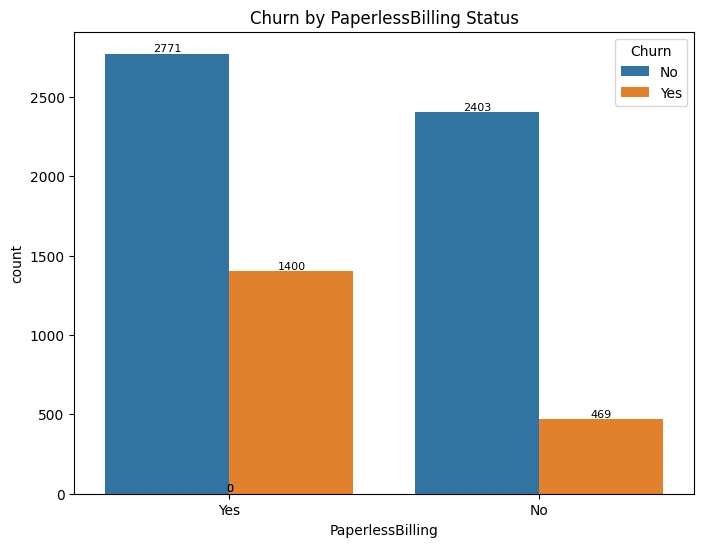

In [38]:
plt.figure(figsize=(8,6))
axs = sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
plt.title("Churn by PaperlessBilling Status")

# Add counts for each bar
for p in axs.patches:
    axs.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.0f}",
            ha="center", va="bottom", size=8)

plt.show()

In [39]:
churn_percentage = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
print(churn_percentage * 100)

Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


In [40]:
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


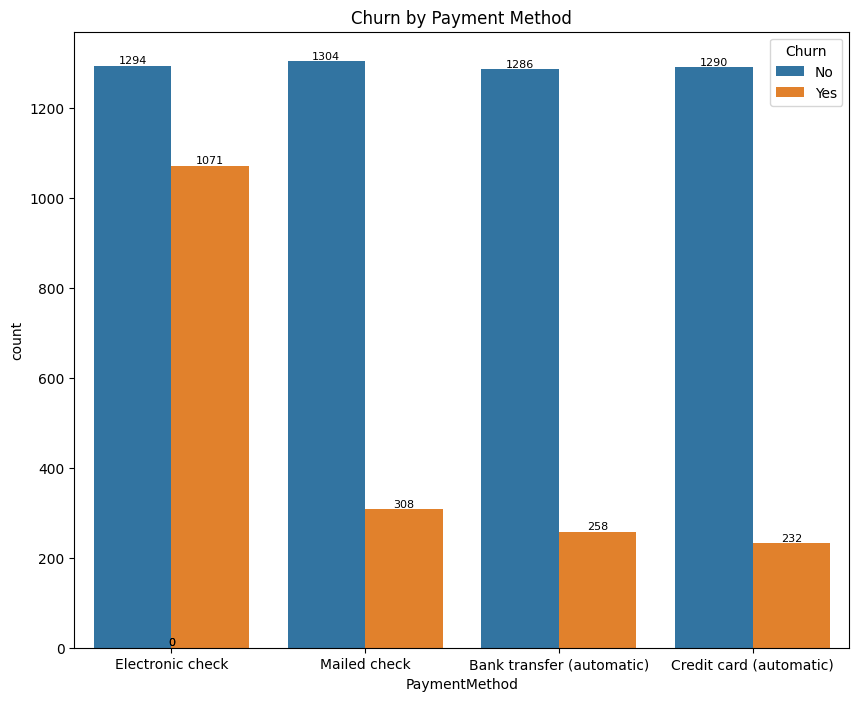

In [41]:
plt.figure(figsize=(10,8))
cx=sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.title("Churn by Payment Method")
for p in cx.patches:
    cx.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.0f}",
            ha="center", va="bottom", size=8)
plt.show()

In [42]:
print(df.groupby(['PaymentMethod'])['Churn'].value_counts())

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64


In [43]:
#Check the number of blanks values in TotalCharges
df[df['TotalCharges'] == ' '].value_counts().sum()

np.int64(11)

In [44]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")
df[df['TotalCharges'] == ' '].value_counts().sum()

np.int64(0)

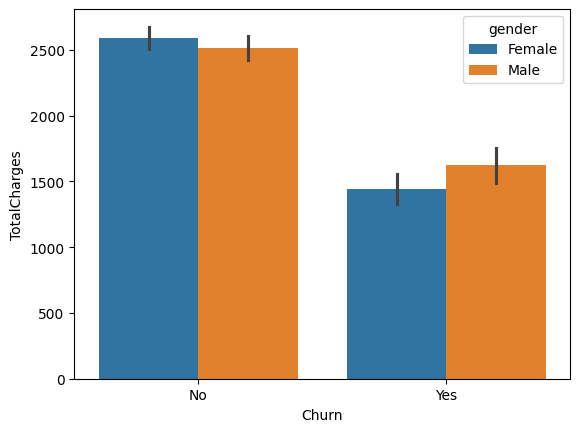

In [45]:
sns.barplot(x='Churn', y='TotalCharges', data=df,hue='gender')
plt.show()

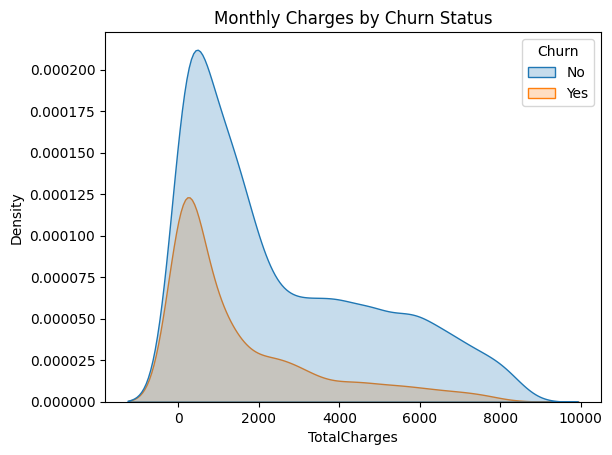

In [46]:
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title("Monthly Charges by Churn Status")
plt.show()

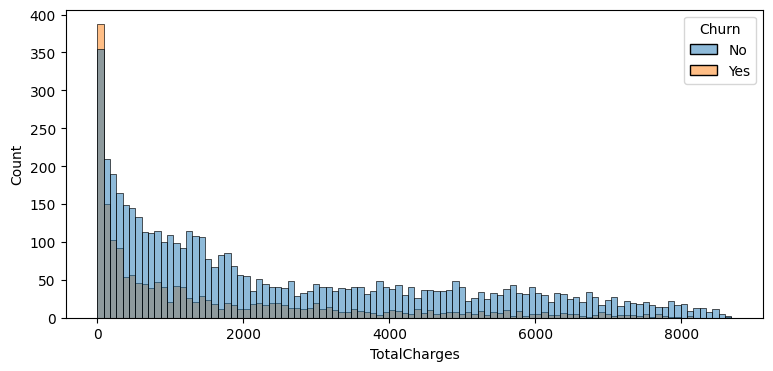

In [47]:
plt.figure(figsize = (9,4))
sns.histplot(x = "TotalCharges", data = df, bins = 100, hue = "Churn")
plt.show()

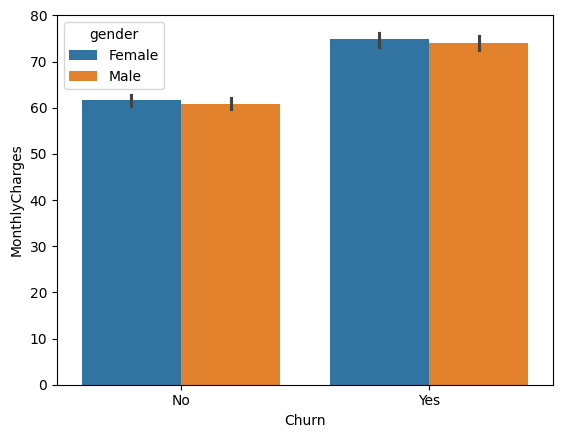

In [48]:
sns.barplot(x='Churn', y='MonthlyCharges', data=df,hue='gender')
plt.show()

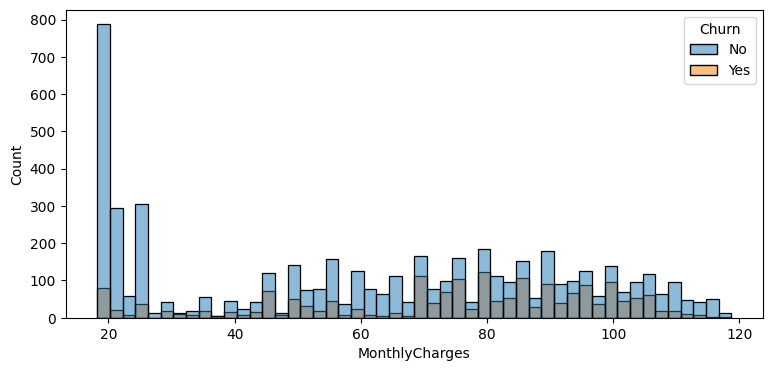

In [49]:
plt.figure(figsize = (9,4))
sns.histplot(x = "MonthlyCharges", data = df, bins = 50, hue = "Churn")
plt.show()

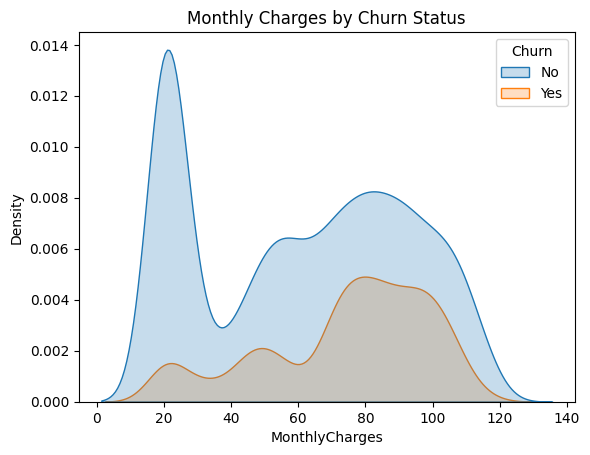

In [50]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges by Churn Status")
plt.show()

**Summary of Key Factors Contributing to Churn:**
Based on the exploratory data analysis of each column, the following factors appear to be most strongly associated with customer churn:

*   **Partner and Dependents:** Customers without partners or dependents have a higher churn rate than those with partners or dependents.
Gender does not appear to be a significant factor in predicting churn.
*   **Tenure:** Customers with shorter tenure, particularly those in the first few months, are significantly more likely to churn. Long-term customers have a much lower churn rate.
*   **Contract Type:** Customers on month-to-month contracts have a substantially higher churn rate compared to those with one-year or two-year contracts.
*   **Internet Service:** Customers with Fiber optic internet service show a higher propensity to churn than those with DSL or no internet service.
Online Security, Online Backup, Device Protection, and Tech Support: Customers who do not have these additional services are more likely to churn. This suggests that these services contribute to customer retention.
*   **Payment Method:** Customers using Electronic Check as their payment method have a higher churn rate compared to those using other methods like automatic bank transfer or credit card.
*   **Total Charges:** Customers with lower total accumulated charges are more likely to churn.
*   **Paperless Billing:** Customers who use paperless billing have a higher churn rate than those who do not.
*   **Senior Citizen Status:** Senior citizens have a higher churn rate than non-senior citizens.

In conclusion, churn is influenced by a combination of factors related to customer engagement, contract terms, services subscribed, payment methods, and demographic information. Customers who are newer, on flexible contracts, use certain internet services, lack additional security/support services, use electronic checks, have lower total charges, use paperless billing, are senior citizens, or do not have partners/dependents are at a higher risk of churning.